In [1]:
import pandas as pd
import pyreadstat as ps
from functools import reduce
import matplotlib.pyplot as plt


In [2]:
og_aut, aut_meta = ps.read_sav('MPNWAVE8_AUTOdata.sav')
og_dab, dab_meta = ps.read_sav('MPNWAVE8_DAGBOEKdata.sav')
og_dag, dag_meta = ps.read_sav('MPNWAVE8_DAGdata.sav')
og_hhd, hhd_meta = ps.read_sav('MPNWAVE8_HHdata.sav')
og_pda, pda_meta = ps.read_sav('MPNWAVE8_Pdata.sav')
og_pbz, pbz_meta = ps.read_sav('MPNWAVE8_Pdata_bijzonder.sav')
og_wee, wee_meta = ps.read_sav('MPNWAVE8_weegfactoren.sav')

In [21]:
display(og_pda.columns.tolist())

['HHID',
 'HH_VALID',
 'DEELNAME',
 'IMPHHDATA',
 'P_VALID',
 'PERSID',
 'DEELNAMEP',
 'JAAR',
 'GESLACHT',
 'POSITIEHH',
 'HERKOMST_w5',
 'WERKSITUATIE_MEEST_w5',
 'WERKSITUATIE_ANDERS1',
 'WERKSITUATIE_ANDERS2',
 'WERKSITUATIE_ANDERS3',
 'WERKSITUATIE_ANDERS4',
 'WERKSITUATIE_ANDERS5',
 'WERKSITUATIE_ANDERS6',
 'WERKSITUATIE_ANDERS7',
 'WERKSITUATIE_ANDERS8',
 'WERKZAAM',
 'SECTORWERK',
 'OPLEIDING',
 'FUNCTIE_WERK',
 'WERKURENRECENT',
 'WERKURENRECENT_CONTINU',
 'N_URENVAST',
 'N_URENVAST_CONTINU',
 'N_URENTHUIS',
 'N_URENTHUIS_CONTINU',
 'N_URENELDERS',
 'N_URENELDERS_CONTINU',
 'N_URENONDERWEG',
 'N_URENONDERWEG_CONTINU',
 'VVM_WERK_w5',
 'RIJBEWIJS',
 'RIJBEWIJS_AUTO',
 'RIJBEWIJS_MOTOR',
 'RIJBEWIJS_BROM_w5',
 'RIJBEWIJS_VRACHT_w5',
 'PVVM',
 'PAUTO',
 'PHYBRID',
 'PBESTEL',
 'PMOTOR',
 'PBROM',
 'PSNOR',
 'PFIETS',
 'PVOUWFIETS',
 'PEBIKE',
 'PSCOOT',
 'PPEDEL',
 'POVERIG',
 'STELLING_PARK',
 'STELLING_AUTO',
 'STELLING_FIETS_w5',
 'STELLING_OV',
 'VVM_VOORKEUR_w5_WERK',
 'VVM_

In [3]:
# aut cleaned
aut_dropcols = ['KENTEKENS_INGEVULD', 'AUTO1_BRANDSTOF_A_w6', 'AUTO1_BRANDSTOF_B_w6', 'AUTO1_BIJTELLING_w5', 'AUTO1_GEWMAX', 'AUTO1_GEWLEEG',  'AUTO1_HLID5', 'AUTO1_HLID6', 'AUTO1_HLID7', 'AUTO1_HLID8', 'AUTO1_HLID9', 'AUTO1_HLID10', 'AUTO1_HLID11', 'AUTO1_HLID12', 'AUTO1_HLID13', 'AUTO2_BRANDSTOF_A_w6', 'AUTO2_BRANDSTOF_B_w6', 'AUTO2_BIJTELLING_w5','AUTO2_GEWMAX', 'AUTO2_GEWLEEG', 'AUTO2_HLID5', 'AUTO2_HLID6', 'AUTO2_HLID7', 'AUTO2_HLID8', 'AUTO2_HLID9', 'AUTO2_HLID10', 'AUTO2_HLID11', 'AUTO2_HLID12', 'AUTO2_HLID13', 'AUTO3_BRANDSTOF_A_w6', 'AUTO3_BRANDSTOF_B_w6', 'AUTO3_BIJTELLING_w5', 'AUTO3_GEWMAX', 'AUTO3_GEWLEEG', 'AUTO3_HLID5', 'AUTO3_HLID6', 'AUTO3_HLID7', 'AUTO3_HLID8', 'AUTO3_HLID9', 'AUTO3_HLID10', 'AUTO3_HLID11', 'AUTO3_HLID12','AUTO3_HLID13','AUTO4_GEWLEEG', 'AUTO4_BRANDSTOF_A_w6', 'AUTO4_BRANDSTOF_B_w6', 'AUTO4_BIJTELLING_w5','AUTO4_HLID5', 'AUTO4_HLID6', 'AUTO4_HLID7', 'AUTO4_HLID8', 'AUTO4_HLID9', 'AUTO4_HLID10', 'AUTO4_HLID11', 'AUTO4_HLID12', 'AUTO4_HLID13', 'AUTO5_BRANDSTOF_A_w6', 'AUTO5_BRANDSTOF_B_w6', 'AUTO5_BIJTELLING_w5', 'AUTO5_GEWMAX', 'AUTO5_GEWLEEG', 'AUTO5_HLID5', 'AUTO5_HLID6', 'AUTO5_HLID7', 'AUTO5_HLID8', 'AUTO5_HLID9', 'AUTO5_HLID10', 'AUTO5_HLID11', 'AUTO5_HLID12', 'AUTO5_HLID13',]
aut_80nan = og_aut.columns[og_aut.isna().mean() > 0.8].tolist()
aut_drop = aut_dropcols + aut_80nan
aut = og_aut.drop(columns=aut_drop, axis=1)


In [4]:
# dab cleaning
dab_dropcols = []
dab_80nan = og_dab.columns[og_dab.isna().mean() > 0.8].tolist()
dab_drop = dab_dropcols + dab_80nan
dab = og_dab.drop(columns=dab_drop, axis=1)

In [5]:
# dag cleaning
dag_dropcols = []
dag_80nan = og_dag.columns[og_dag.isna().mean() > 0.8].tolist()
dag_drop = dag_dropcols + dag_80nan
dag = og_dag.drop(columns=dag_drop, axis=1)

In [6]:
# hhd cleaned

hhd_dropcols = ['PROV', 'HHMOTOR', 'HHBROM', 'HHSNOR', 'HHFIETS', 'HHVOUWFIETS', 'HHEBIKE', 'HHPEDEL', 'HHSCOOT', 'HHOVG', 'HHGEEN', 'KENTEKENINFO', 'woonpc2']
hhd_80nan = og_hhd.columns[og_hhd.isna().mean() > 0.8].tolist()
hhd_drop = hhd_dropcols + hhd_80nan
hhd = og_hhd.drop(columns=hhd_drop, axis=1)

# hhd = hhd.drop(hhd[hhd['COROP'] != 23].index) # Greater-Amsterdam
# hhd = hhd.drop(hhd[hhd['STED_GM'] != 1].index) # high urbanization

In [7]:
#pda cleaning

pda_dropcols = ['HH_VALID']
pda_80nan = og_pda.columns[og_pda.isna().mean() > 0.8].tolist()
pda_drop = pda_dropcols + pda_80nan
pda = og_pda.drop(columns=pda_drop, axis=1)

In [8]:
#pbz cleaned
pbz_dropcols = ['OORDEEL_TREIN', 'OORDEEL_BTM', 'OORDEEL_FIETS', 'OORDEEL_BROMMER', 'OORDEEL_LOPEN', 'OORDEEL_VLIEGTUIG', 'GEBRUIK_TREIN_STELLING1', 'GEBRUIK_TREIN_STELLING2', 'GEBRUIK_TREIN_STELLING3', 'GEBRUIK_TREIN_STELLING4', 'GEBRUIK_TREIN_STELLING5', 'GEBRUIK_TREIN_STELLING6', 'GEBRUIK_TREIN_STELLING7', 'GEBRUIK_BTM_STELLING1', 'GEBRUIK_BTM_STELLING2', 'GEBRUIK_BTM_STELLING3', 'GEBRUIK_BTM_STELLING4', 'GEBRUIK_BTM_STELLING5', 'GEBRUIK_BTM_STELLING6', 'GEBRUIK_BTM_STELLING7', 'GEBRUIK_FIETS_STELLING1', 'GEBRUIK_FIETS_STELLING2', 'GEBRUIK_FIETS_STELLING3', 'GEBRUIK_FIETS_STELLING4', 'GEBRUIK_FIETS_STELLING5', 'GEBRUIK_FIETS_STELLING6', 'GEBRUIK_FIETS_STELLING7', 'GEBRUIK_LOPEN_STELLING1', 'GEBRUIK_LOPEN_STELLING2', 'GEBRUIK_LOPEN_STELLING3', 'GEBRUIK_LOPEN_STELLING4', 'GEBRUIK_LOPEN_STELLING5', 'GEBRUIK_LOPEN_STELLING6', 'GEBRUIK_LOPEN_STELLING7', 'VVM_TOEKOMST_ANDERS_TREIN', 'VVM_TOEKOMST_ANDERS_BTM', 'VVM_TOEKOMST_ANDERS_FIETS', 'VVM_TOEKOMST_ANDERS_BROM', 'VVM_TOEKOMST_ANDERS_LOPEN', 'VVM_TOEKOMST_ANDERS_VLIEGTUIG', 'COR_OV_VOORHEEN_TREIN', 'COR_OV_VOORHEEN_BTM', 'COR_BTM_SUBST_1', 'COR_BTM_SUBST_2', 'COR_BTM_SUBST_5', 'COR_TREIN_SUBST_1', 'COR_TREIN_SUBST_2', 'COR_TREIN_SUBST_4', 'COR_OV_SUBST_FIETS_ERV_S1', 'COR_OV_SUBST_FIETS_ERV_S2', 'COR_OV_SUBST_FIETS_ERV_S3', 'COR_OV_SUBST_BROM_ERV_S1', 'COR_OV_SUBST_BROM_ERV_S2', 'COR_OV_SUBST_BROM_ERV_S3', 'COR_OV_SUBST_LOOP_ERV_S1', 'COR_OV_SUBST_LOOP_ERV_S2', 'COR_OV_SUBST_LOOP_ERV_S3']
pbz_80nan = og_pbz.columns[og_pbz.isna().mean() > 0.8].tolist()
pbz_drop = pbz_dropcols + pbz_80nan
pbz = og_pbz.drop(columns=pbz_drop, axis=1)


In [22]:
all = [aut, dab, hhd, pda]

movement = [dag, pda, pbz]


In [23]:
for i, df in enumerate(all):
    if not isinstance(df, (pd.DataFrame, pd.Series)):
        print(f"Element {i} is of type {type(df)}, not a Pandas DataFrame or Series.")

In [29]:
merged = pd.concat(all, join='inner', axis=1).fillna(0)
merged = merged.loc[:, ~merged.columns.duplicated()] # drop duplicates
#merged = pd.merge(merged, pda[['HHID', 'OPLEIDING']], on='HHID', how='left')
#merged = pd.merge(merged, pda[['HHID', 'KLEEFT2']], on='HHID', how='left')



['HHID',
 'HH_VALID',
 'IMPHHDATA',
 'DEELNAMEHH',
 'JAAR',
 'HHAUTO_N',
 'AUTO1',
 'AUTO1_KM',
 'AUTO1_AANSCHAF',
 'AUTO1_HFDGBR',
 'AUTO1_INRICHT',
 'AUTO1_PRIVE',
 'AUTO1_HLID1',
 'AUTO1_HLID2',
 'AUTO1_HLID3',
 'AUTO2',
 'AUTO2_KM',
 'AUTO2_AANSCHAF',
 'AUTO2_HFDGBR',
 'AUTO2_PRIVE',
 'AUTO2_HLID1',
 'AUTO3',
 'AUTO4',
 'AUTO5',
 'KAUTO1_BOUWJAAR',
 'KAUTO2_BOUWJAAR',
 'PERSOON',
 'PERSID',
 'P_VALID',
 'VPLID',
 'WEGGEWEEST',
 'VERTREKP',
 'AANTVPL',
 'VPLDAGNR',
 'VERPL',
 'VERPLNR',
 'TOER',
 'TOER_TYPE',
 'AANTRIT',
 'DOEL',
 'MOTIEF',
 'KMOTIEF',
 'VERTPROV',
 'AANKPROV',
 'AFSTV',
 'AFSTV_ORG',
 'G_AFSTAND',
 'KAFSTV',
 'HVM',
 'KHVM',
 'KVERTTIJD',
 'REISDUUR',
 'KREISDUUR',
 'REISDUUR_ORG',
 'G_REISDUUR',
 'ROLAUTO',
 'PARKEERKOSTEN',
 'VERTRAGING',
 'AutoSoort',
 'RitID',
 'RIT',
 'RITNR',
 'RVM',
 'KRVM',
 'Bestuurder',
 'SAMENREIZEN',
 'CORRECTIE_VVM',
 'MARKERING_VVM',
 'CORRECTIE_AFSTAND',
 'CORRECTIE_REISTIJD',
 'MARKERING_REISTIJD1',
 'MARKERING_REISTIJD2',
 'MARKERI

In [12]:
# Correlation matrix
column_headers = merged.columns
for columns in column_headers:
    print(columns)

HHID
HH_VALID
IMPHHDATA
DEELNAMEHH
JAAR
HHAUTO_N
AUTO1
AUTO1_KM
AUTO1_AANSCHAF
AUTO1_HFDGBR
AUTO1_INRICHT
AUTO1_PRIVE
AUTO1_HLID1
AUTO1_HLID2
AUTO1_HLID3
AUTO2
AUTO2_KM
AUTO2_AANSCHAF
AUTO2_HFDGBR
AUTO2_PRIVE
AUTO2_HLID1
AUTO3
AUTO4
AUTO5
KAUTO1_BOUWJAAR
KAUTO2_BOUWJAAR
PERSOON
PERSID
P_VALID
VPLID
WEGGEWEEST
VERTREKP
AANTVPL
VPLDAGNR
VERPL
VERPLNR
TOER
TOER_TYPE
AANTRIT
DOEL
MOTIEF
KMOTIEF
VERTPROV
AANKPROV
AFSTV
AFSTV_ORG
G_AFSTAND
KAFSTV
HVM
KHVM
KVERTTIJD
REISDUUR
KREISDUUR
REISDUUR_ORG
G_REISDUUR
ROLAUTO
PARKEERKOSTEN
VERTRAGING
AutoSoort
RitID
RIT
RITNR
RVM
KRVM
Bestuurder
SAMENREIZEN
CORRECTIE_VVM
MARKERING_VVM
CORRECTIE_AFSTAND
CORRECTIE_REISTIJD
MARKERING_REISTIJD1
MARKERING_REISTIJD2
MARKERING_AFSTAND
MARKERING_OVERIG
vlokatie_centrumsgw
vlokatie_opafrit
vlokatie_icknooppunt
vlokatie_station
vlokatie_metrosneltramhalte
vlokatie_tramhalte
vlokatie_bushalte4xpu
vlokatie_bushalte2xpu
vlokatie_bushalte1xpu
vlokatie_bushaltekl1xpu
alokatie_centrumsgw
alokatie_opafrit
alokatie_ickn

In [13]:
move = dag.merge(pda, on = 'PERSID', how='inner').fillna(0)
move = move.loc[:, ~move.columns.duplicated()] # drop duplicates
display(move)

,PERSOON,HHID_x,HH_VALID,IMPHHDATA_x,P_VALID_x,PERSID,JAAR_x,VPLDAGNR,WEGGEWEEST,REISGEDRAG,...,INVLOED5_EVENT_WONING13,INVLOED6_EVENT_WONING13,INVLOED7_EVENT_WONING13,INVLOED8_EVENT_WONING13,INVLOED9_EVENT_WONING13,INVLOED10_EVENT_w5_WONING13,INVLOED11_EVENT_WONING13,INVLOED12_EVENT_WONING13,INVLOED_EVENT_WONING13,KLEEFT2
0,1.0,30000715.0,1.0,2.0,3.0,3.000072e+09,2020.0,1.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0
1,0.0,30000715.0,1.0,2.0,3.0,3.000072e+09,2020.0,2.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0
2,0.0,30000715.0,1.0,2.0,3.0,3.000072e+09,2020.0,3.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0
3,1.0,30000715.0,1.0,2.0,3.0,3.000072e+09,2020.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,6.0
4,0.0,30000715.0,1.0,2.0,3.0,3.000072e+09,2020.0,2.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15961,0.0,80000215.0,2.0,2.0,3.0,8.000022e+09,2020.0,2.0,0.0,99.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0
15962,0.0,80000215.0,2.0,2.0,3.0,8.000022e+09,2020.0,3.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0
15963,1.0,80000215.0,2.0,2.0,3.0,8.000022e+09,2020.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0
15964,0.0,80000215.0,2.0,2.0,3.0,8.000022e+09,2020.0,2.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0


In [14]:
# display(move['HHID_x'].value_counts())
# display(move['PERSID'].value_counts())
# display(move)


move.sort_values(by='HHID_x', inplace=True)

# Create a dictionary to store DataFrames split by 'HHID_x'
split_dfs = {}
prev_HHID = None
start_idx = 0

for idx, row in move.iterrows():
    current_HHID = row['HHID_x']
    
    if current_HHID != prev_HHID and prev_HHID is not None:
        split_dfs[prev_HHID] = move.iloc[start_idx:idx]
        start_idx = idx
    
    prev_HHID = current_HHID

# Store the last group
split_dfs[prev_HHID] = move.iloc[start_idx:]

# Now split_dfs contains DataFrames for each unique 'HHID_x'
# for key, df in split_dfs.items():
    # print(f"DataFrame for HHID_x {key}:")
    # print(df)
    # print("\n") 

# Accessing a specific DataFrame from the dictionary
specific_HHID_df = split_dfs[30000715.0]

# Print the DataFrame or perform operations on it
display(specific_HHID_df)

,PERSOON,HHID_x,HH_VALID,IMPHHDATA_x,P_VALID_x,PERSID,JAAR_x,VPLDAGNR,WEGGEWEEST,REISGEDRAG,...,INVLOED5_EVENT_WONING13,INVLOED6_EVENT_WONING13,INVLOED7_EVENT_WONING13,INVLOED8_EVENT_WONING13,INVLOED9_EVENT_WONING13,INVLOED10_EVENT_w5_WONING13,INVLOED11_EVENT_WONING13,INVLOED12_EVENT_WONING13,INVLOED_EVENT_WONING13,KLEEFT2
0,1.0,30000715.0,1.0,2.0,3.0,3.000072e+09,2020.0,1.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0
1,0.0,30000715.0,1.0,2.0,3.0,3.000072e+09,2020.0,2.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0
2,0.0,30000715.0,1.0,2.0,3.0,3.000072e+09,2020.0,3.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0
3,1.0,30000715.0,1.0,2.0,3.0,3.000072e+09,2020.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,6.0
4,0.0,30000715.0,1.0,2.0,3.0,3.000072e+09,2020.0,2.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,6.0
5,0.0,30000715.0,1.0,2.0,3.0,3.000072e+09,2020.0,3.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,6.0


from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

X = hhd
Y = X

# Function to plot true labels and cluster labels side by side
def plot_true_vs_clustered(X, true_labels, cluster_labels, cluster_centers=None):
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # Plot true labels
    axs[0].set_title('True Labels')
    unique_true_labels = set(true_labels)
    colors_true = plt.cm.rainbow(np.linspace(0, 1, len(unique_true_labels)))
    for k, col in zip(unique_true_labels, colors_true):
        class_member_mask = (true_labels == k)
        xy = X[class_member_mask]
        axs[0].plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)

    # Plot clustered labels
    axs[1].set_title('Clustered Labels')
    unique_cluster_labels = set(cluster_labels)
    colors_cluster = plt.cm.rainbow(np.linspace(0, 1, len(unique_cluster_labels)))
    for k, col in zip(unique_cluster_labels, colors_cluster):
        class_member_mask = (cluster_labels == k)
        xy = X[class_member_mask]
        axs[1].plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
        if cluster_centers is not None and k != -1:
            center = cluster_centers[k]
            axs[1].plot(center[0], center[1], 'o', markerfacecolor=col, markeredgecolor='k', markeredgewidth=2, markersize=14)

    plt.show()

# Function to plot the first two columns
def plot_clustered(X, cluster_centers):
    X = np.asarray(X)
    nfeature = X.shape[-1]
    if nfeature > 2:
        X = X[:,:2]
    if nfeature < 2:
        print("Error")
    # Plot clustered labels
    unique_cluster_labels = set(cluster_labels)
    colors_cluster = plt.cm.rainbow(np.linspace(0, 1, len(unique_cluster_labels)))
    for k, col in zip(unique_cluster_labels, colors_cluster):
        class_member_mask = (cluster_labels == k)
        xy = X[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col)
    plt.show()

# Generate synthetic data
X, true_labels = make_blobs(n_samples=300, centers=4, cluster_std=0.80, random_state=0)

# KMeans crucial parameters: n_clusters, init, n_init, max_iter, random_state
# This is the method
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)
cluster_labels = kmeans.fit_predict(X)

### The algorithm end here, the following code calculates the number of each clusters and plots it
cluster_counts = Counter(cluster_labels)
print(f"Algorithm found {len(cluster_counts)} clusters.")
print("Points per cluster:", cluster_counts)
true_label_counts = Counter(true_labels)
print(f"True labels have {len(true_label_counts)} clusters.")
print("Points per cluster for true labels:", true_label_counts)

# Silhouette Score
print(f"Silhouette Score: {silhouette_score(X, cluster_labels)}\n")

# Plot true labels vs. clustering results
plot_clustered(X, cluster_labels)
#plot_true_vs_clustered(X, true_labels, cluster_labels)

In [15]:
correlation_matrix = Y.corr()

# Print or display the correlation matrix
print(correlation_matrix)

NameError: name 'Y' is not defined

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'correlation_matrix' is your computed correlation matrix

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a heatmap using seaborn with masked upper triangle
plt.figure(figsize=(80, 64))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap (Lower Triangle)')
plt.show()

graph hypothesis 1

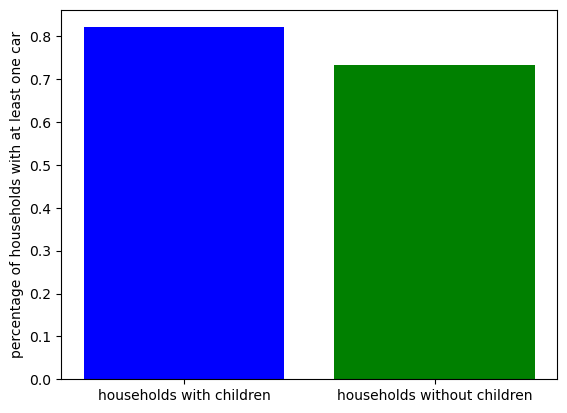

In [16]:
#create dataframe with only respondent in the Amsterdam are
amsterdam_data = merged[merged['COROP']==23]

#creating variable to count households
hh_with_kids = 0
hh_withno_kids = 0
hh_with_kids_with_cars = 0
hh_withno_kids_with_cars = 0

#counting all necessary values for the chart
for i in range(len(amsterdam_data)):
    if amsterdam_data.iloc[i]['N_KIND'] > 0:
        hh_with_kids += 1
        if amsterdam_data.iloc[i]['HHAUTO_N'] > 0:
            hh_with_kids_with_cars += 1
    if amsterdam_data.iloc[i]['N_KIND'] == 0:
        hh_withno_kids +=1
        if amsterdam_data.iloc[i]['HHAUTO_N'] > 0:
            hh_withno_kids_with_cars += 1
    i += 1

# Values and labels for the bars 
values = [hh_with_kids_with_cars/hh_with_kids, hh_withno_kids_with_cars/hh_withno_kids]
labels = ['households with children', 'households without children']

# Creating a bar chart
plt.bar(labels, values, color=['blue', 'green'])
plt.ylabel('percentage of households with at least one car')
plt.show()


In [ ]:
# making a graph 

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'OPLEIDING' column to categorical with specified order
opleiding_order = ['1.0', '3.0', '4.0', '6.0', '7.0', '8.0']
filtered_data.loc[:, 'OPLEIDING'] = pd.Categorical(filtered_data['OPLEIDING'], categories=opleiding_order, ordered=True)

columns_to_plot = ['HHBRUTOINK2_w5', 'STED_GM', 'N_KIND', 'HHAUTO_N', 'OPLEIDING']

column_names = {
    'HHBRUTOINK2_w5': 'income',
    'STED_GM': 'urbanisation',
    'N_KIND': 'number of children',
    'HHAUTO_N': 'number of cars',
    'OPLEIDING': 'education'
}

fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(8, 2 * len(columns_to_plot)))

# Ensure axes is always an iterable even for a single subplot
if len(columns_to_plot) == 1:
    axes = [axes]
for i, column in enumerate(columns_to_plot):
    sns.histplot(filtered_data[column], ax=axes[i], kde=True)
    axes[i].set_title(column_names.get(column, f'Column {column}'))

plt.tight_layout()
plt.show()


NameError: name 'filtered_data' is not defined

Principal Component Analysis

/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning:

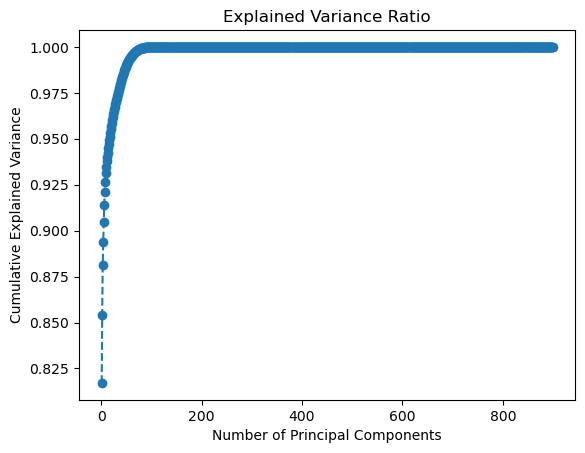

         PC1        PC2       PC3       PC4       PC5       PC6       PC7  \
0 -13.099706  17.231359  0.323297 -2.234767 -0.106323 -3.696713  0.039925   
1 -13.099527  17.223040  0.324705 -2.231785 -0.096123 -3.697390  0.030009   
2 -13.098991  17.198081  0.328932 -2.222839 -0.065525 -3.699418  0.000260   
3 -13.099744  17.231322  0.323395 -2.234020 -0.102695 -3.696020  0.036152   
4 -13.099566  17.223003  0.324803 -2.231038 -0.092495 -3.696697  0.026236   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  1.635318 -6.553095 -2.343563  0.896926  0.544730 -0.867337 -0.145565   
1  1.672656 -6.551741 -2.229367  0.894330  0.479460 -0.918952 -0.170617   
2  1.784672 -6.547678 -1.886779  0.886539  0.283651 -1.073798 -0.245772   
3  1.636369 -6.553159 -2.341127  0.896993  0.541569 -0.867212 -0.146722   
4  1.673708 -6.551805 -2.226932  0.894396  0.476299 -0.918828 -0.171773   

       PC15      PC16      PC17  HHAUTO_N  
0  1.434986 -0.878840  2.413218       1.0 

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# get target variable
target_variable = 'HHAUTO_N'
X = merged.drop(target_variable, axis=1)  
y = merged[target_variable]  

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)


# Access explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = explained_var_ratio.cumsum()
n_components_to_retain = (cumulative_var_ratio < 0.95).sum() + 1

# Visualize explained variance ratio
plt.plot(range(1, len(explained_var_ratio) + 1), cumulative_var_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.show()

# Fit PCA again with the determined number of components
pca_final = PCA(n_components=n_components_to_retain)
X_pca_final = pca_final.fit_transform(X_scaled)

# Create a DataFrame with the principal components
pc_columns = [f'PC{i}' for i in range(1, n_components_to_retain + 1)]
pc_df = pd.DataFrame(data=X_pca_final, columns=pc_columns)
result_df = pd.concat([pc_df, y.reset_index(drop=True)], axis=1)

# Print the final DataFrame with principal components and the target variable
print(result_df.head())

In [32]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Create separate groups based on 'age', 'gender', and 'education'
# Split age into 5 groups
merged['age_group'] = pd.cut(merged['KLEEFT2'], bins=5)

# Create a MultiIndex DataFrame grouping by 'age_group', 'gender', and 'education'
grouped_data = merged.groupby(['age_group', 'GESLACHT', 'OPLEIDING'])

# Independent variables (multiple predictors)
independent_cols = ['HHBRUTOINK2_w5', 'STED_GM', 'N_KIND', 'OPLEIDING', 'GESLACHT']

# Create an empty DataFrame to store regression results
regression_results = pd.DataFrame(columns=['Segment', 'Coefficients', 'Intercept'])

# Perform linear regression for each group
for group_name, group_data in grouped_data:
    # Extract the group's data
    X = group_data[independent_cols]  # Independent variables (predictors)
    y = group_data['HHAUTO_N']  # Dependent variable
    
    # Initialize the linear regression model
    model = LinearRegression()
    
    # Fit the linear regression model
    model.fit(X, y)
    
    # Get coefficients and intercept
    coefficients = model.coef_
    intercept = model.intercept_
    
    # Append results to the DataFrame
    regression_results = regression_results.append({
        'Segment': group_name,
        'Coefficients': coefficients,
        'Intercept': intercept
    }, ignore_index=True)

# Display regression results for each segment
print(regression_results)


/var/folders/f0/g61h031s7yscf43_m6xj3l0c0000gn/T/ipykernel_81416/3880621707.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = merged.groupby(['age_group', 'GESLACHT', 'OPLEIDING'])
/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/majamurawka/opt/anaconda3/en

AttributeError: 'DataFrame' object has no attribute 'append'